# 1. Playing in Ipython

## Start in Ipython

I always start coding in ipython to quickly prototype code and play around.

However, Ipython is not a real development environment; when things get serious, I start making my own packages with PyCharm and version control software. Things will quickly become too complex if you only stay in ipython!

### examples of playing around

IPython (now being renamed to Jupyter) is awesome. You can do all sorts of fun stuff, i.e.

In [1]:
#used to import plotting stuff
%pylab inline   

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns # Makes plots prettier
sns.set_context('poster', font_scale=1.25)

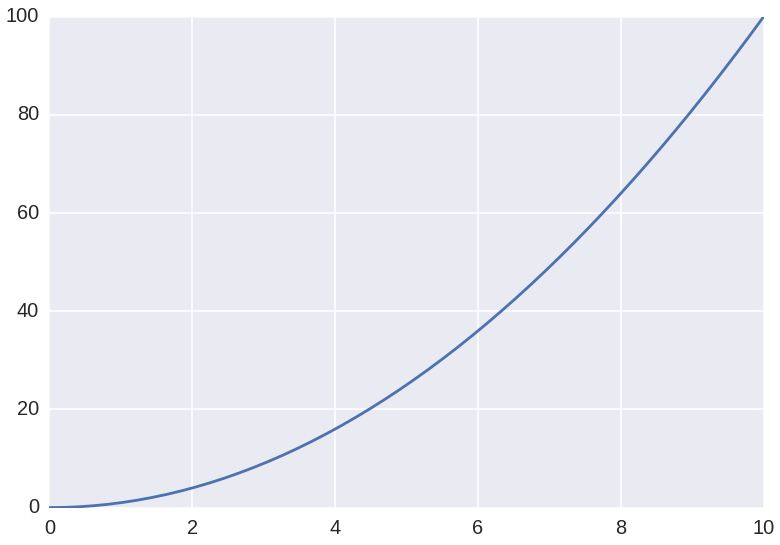

In [3]:
x = np.linspace(0, 10)
plt.plot(x, x**2)

You can also type in Markdown, i.e.

* Hi
   * Hello
* Math is fun $x^2 + y^2 + z^2$

You can also pull in fun things from the web, i.e.

In [4]:
import IPython.display as d

In [5]:
d.Image(url='http://www.nyan.cat/cats/original.gif')

You can quickly prototype code. Let's make a do-work function.

In [6]:
def do_work(num_simulations=10**6):
    x = 0
    for i in range(num_simulations):
        x += 1
    return x

In [7]:
%timeit do_work()

10 loops, best of 3: 41.1 ms per loop


You can quickly prototype code in cython as well.

In [8]:
%load_ext cython

In [9]:
%%cython -a 

cpdef do_work_faster(num_simulations=10**6):
    x = 0
    for i in range(num_simulations):
        x += 1
    return x

In [10]:
%timeit do_work_faster()

10 loops, best of 3: 18.7 ms per loop


Yellow lines are bad. We need to optimize our code.

In [11]:
%%cython -a 

cpdef int do_work_fastest(int num_simulations=10**6):
    cdef int x = 0
    cdef int i
    with nogil:
        for i in range(num_simulations):
            x += 1
        return x

In [12]:
%timeit do_work_fastest()

The slowest run took 110.97 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 53.7 ns per loop


Ok that is pretty fast.

## Question

When our code becomes too complicated in IPython, where do we go? Pycharm! Or another development environment. I like Pycharm.

# Pycharm

In [13]:
d.IFrame('https://www.jetbrains.com/pycharm/', 500, 250)

We copy and paste our code into pycharm and organize it in a coherent manner. We then create a "setup" script that pycharm will automatically generate for us.

We then run the command when in the directory of the package

`pip install --editable .`

To install our package locally. The `--editable` flag is important; when we alter the program in the package, the changes will immediately show up everywhere else (this is what we want when developing).

When we want to install something for real, we run

`pip install .`

# Interacting with the Package in pycharm

Pycharm features a number of nice things like a matlab-like debugger. I generally don't use this, although I probably should, I usually just debug things in IPython. I use a debugger if things get super complicated.

In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload 2

This will definitely make it that changes in the package show up immediately.

In [29]:
from my_python_workflow import py_work as pw

In [30]:
pw.do_work_in_pycharm()

1000000

We version control our code with git.

Remember: the master branch is sacred! Put your playing in different branches.

# Compiling into cython in your package

This is more tricky, but still not bad. Just create a pxd file with the function you want.